In [51]:
import cPickle as pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [3]:
def open_prepper(file_path):
    """Open the DataPrepper from pickled file."""
    with open(file_path) as f:
        prepper = pickle.load(f)
    return prepper

In [20]:
file_path = '../data/store/data_prepper_ALL-CATEGORIES.pkl'
prepper = open_prepper(file_path)

In [21]:
X_train, y_train = prepper.return_training_data()

In [22]:
X_test, y_test = prepper.return_testing_data()

In [29]:
prepper.column_limits

{'image_ncomments_quantized': ([0.0, 0.0, 0.0, 0.0, 0.0, 652.0], 'quantized'),
 'image_nfavs_quantized': ([0.0, 0.0, 0.0, 0.0, 1.0, 3320.0], 'quantized'),
 'image_npools_quantized': ([0.0, 0.0, 0.0, 0.0, 1.0, 671.0], 'quantized'),
 'image_nsets_quantized': ([0.0, 1.0, 1.0, 1.0, 1.0, 31.0], 'quantized'),
 'image_views_quantized': ([0.0, 21.0, 38.0, 63.0, 188.0, 83589.0],
  'quantized'),
 'user_total_views_quantized': ([0.0,
   869.0,
   3250.0,
   10801.0,
   36304.0,
   273426.0],
  'quantized')}

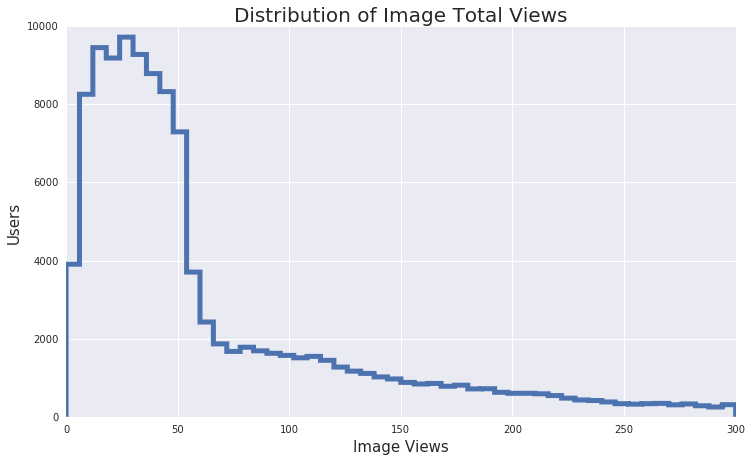

In [58]:
plt.figure(figsize=(12, 7))
plt.title("Distribution of Image Total Views", fontsize=20)
plt.xlabel("Image Views", fontsize=15)
plt.ylabel("Users", fontsize=15)


plt.hist(y_train['image_views'][y_train['image_views']<=300], bins=50, histtype='step', lw=5)
plt.savefig('image_views_hist.png')

(array([ 27790.,      0.,  26554.,      0.,      0.,  25214.,      0.,
         26271.,      0.,  26457.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

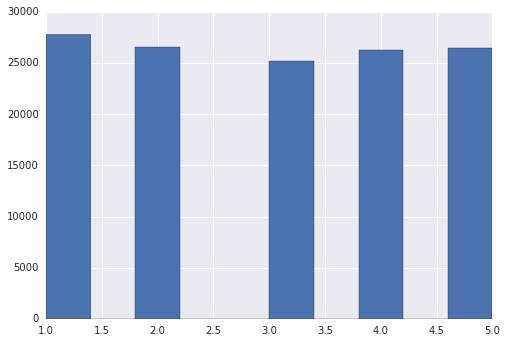

In [59]:
plt.hist(y_train['image_views_quantized'])

In [60]:
prepper.column_limits

{'image_ncomments_quantized': ([0.0, 0.0, 0.0, 0.0, 0.0, 652.0], 'quantized'),
 'image_nfavs_quantized': ([0.0, 0.0, 0.0, 0.0, 1.0, 3320.0], 'quantized'),
 'image_npools_quantized': ([0.0, 0.0, 0.0, 0.0, 1.0, 671.0], 'quantized'),
 'image_nsets_quantized': ([0.0, 1.0, 1.0, 1.0, 1.0, 31.0], 'quantized'),
 'image_views_quantized': ([0.0, 21.0, 38.0, 63.0, 188.0, 83589.0],
  'quantized'),
 'user_total_views_quantized': ([0.0,
   869.0,
   3250.0,
   10801.0,
   36304.0,
   273426.0],
  'quantized')}

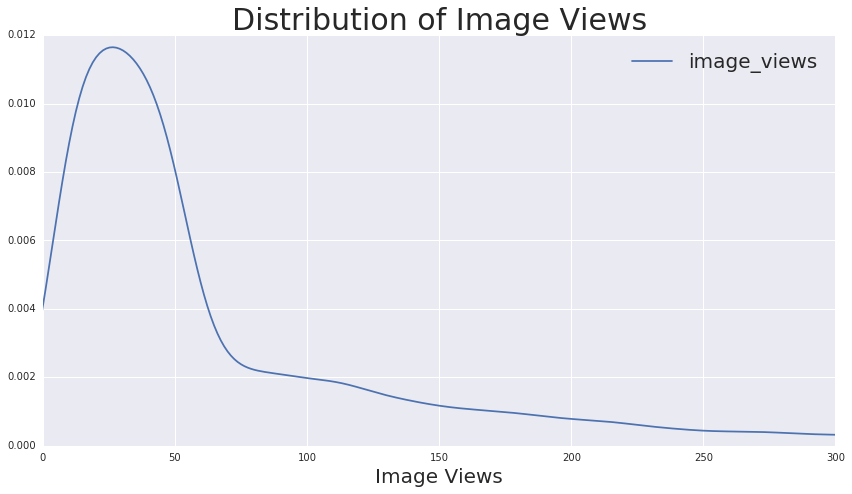

In [100]:
dir_for_app_plots = '../app/static/analytics/img/'
plt.figure(figsize=(12, 7))
plt.title("Distribution of Image Views", fontsize=30)
plt.xlabel("Image Views", fontsize=20)
# seaborn.set_style(style='darkgrid')
seaborn.kdeplot(y_train['image_views'], gridsize=50000)
plt.xlim(0, 300)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(dir_for_app_plots+'image_views_hist.png')

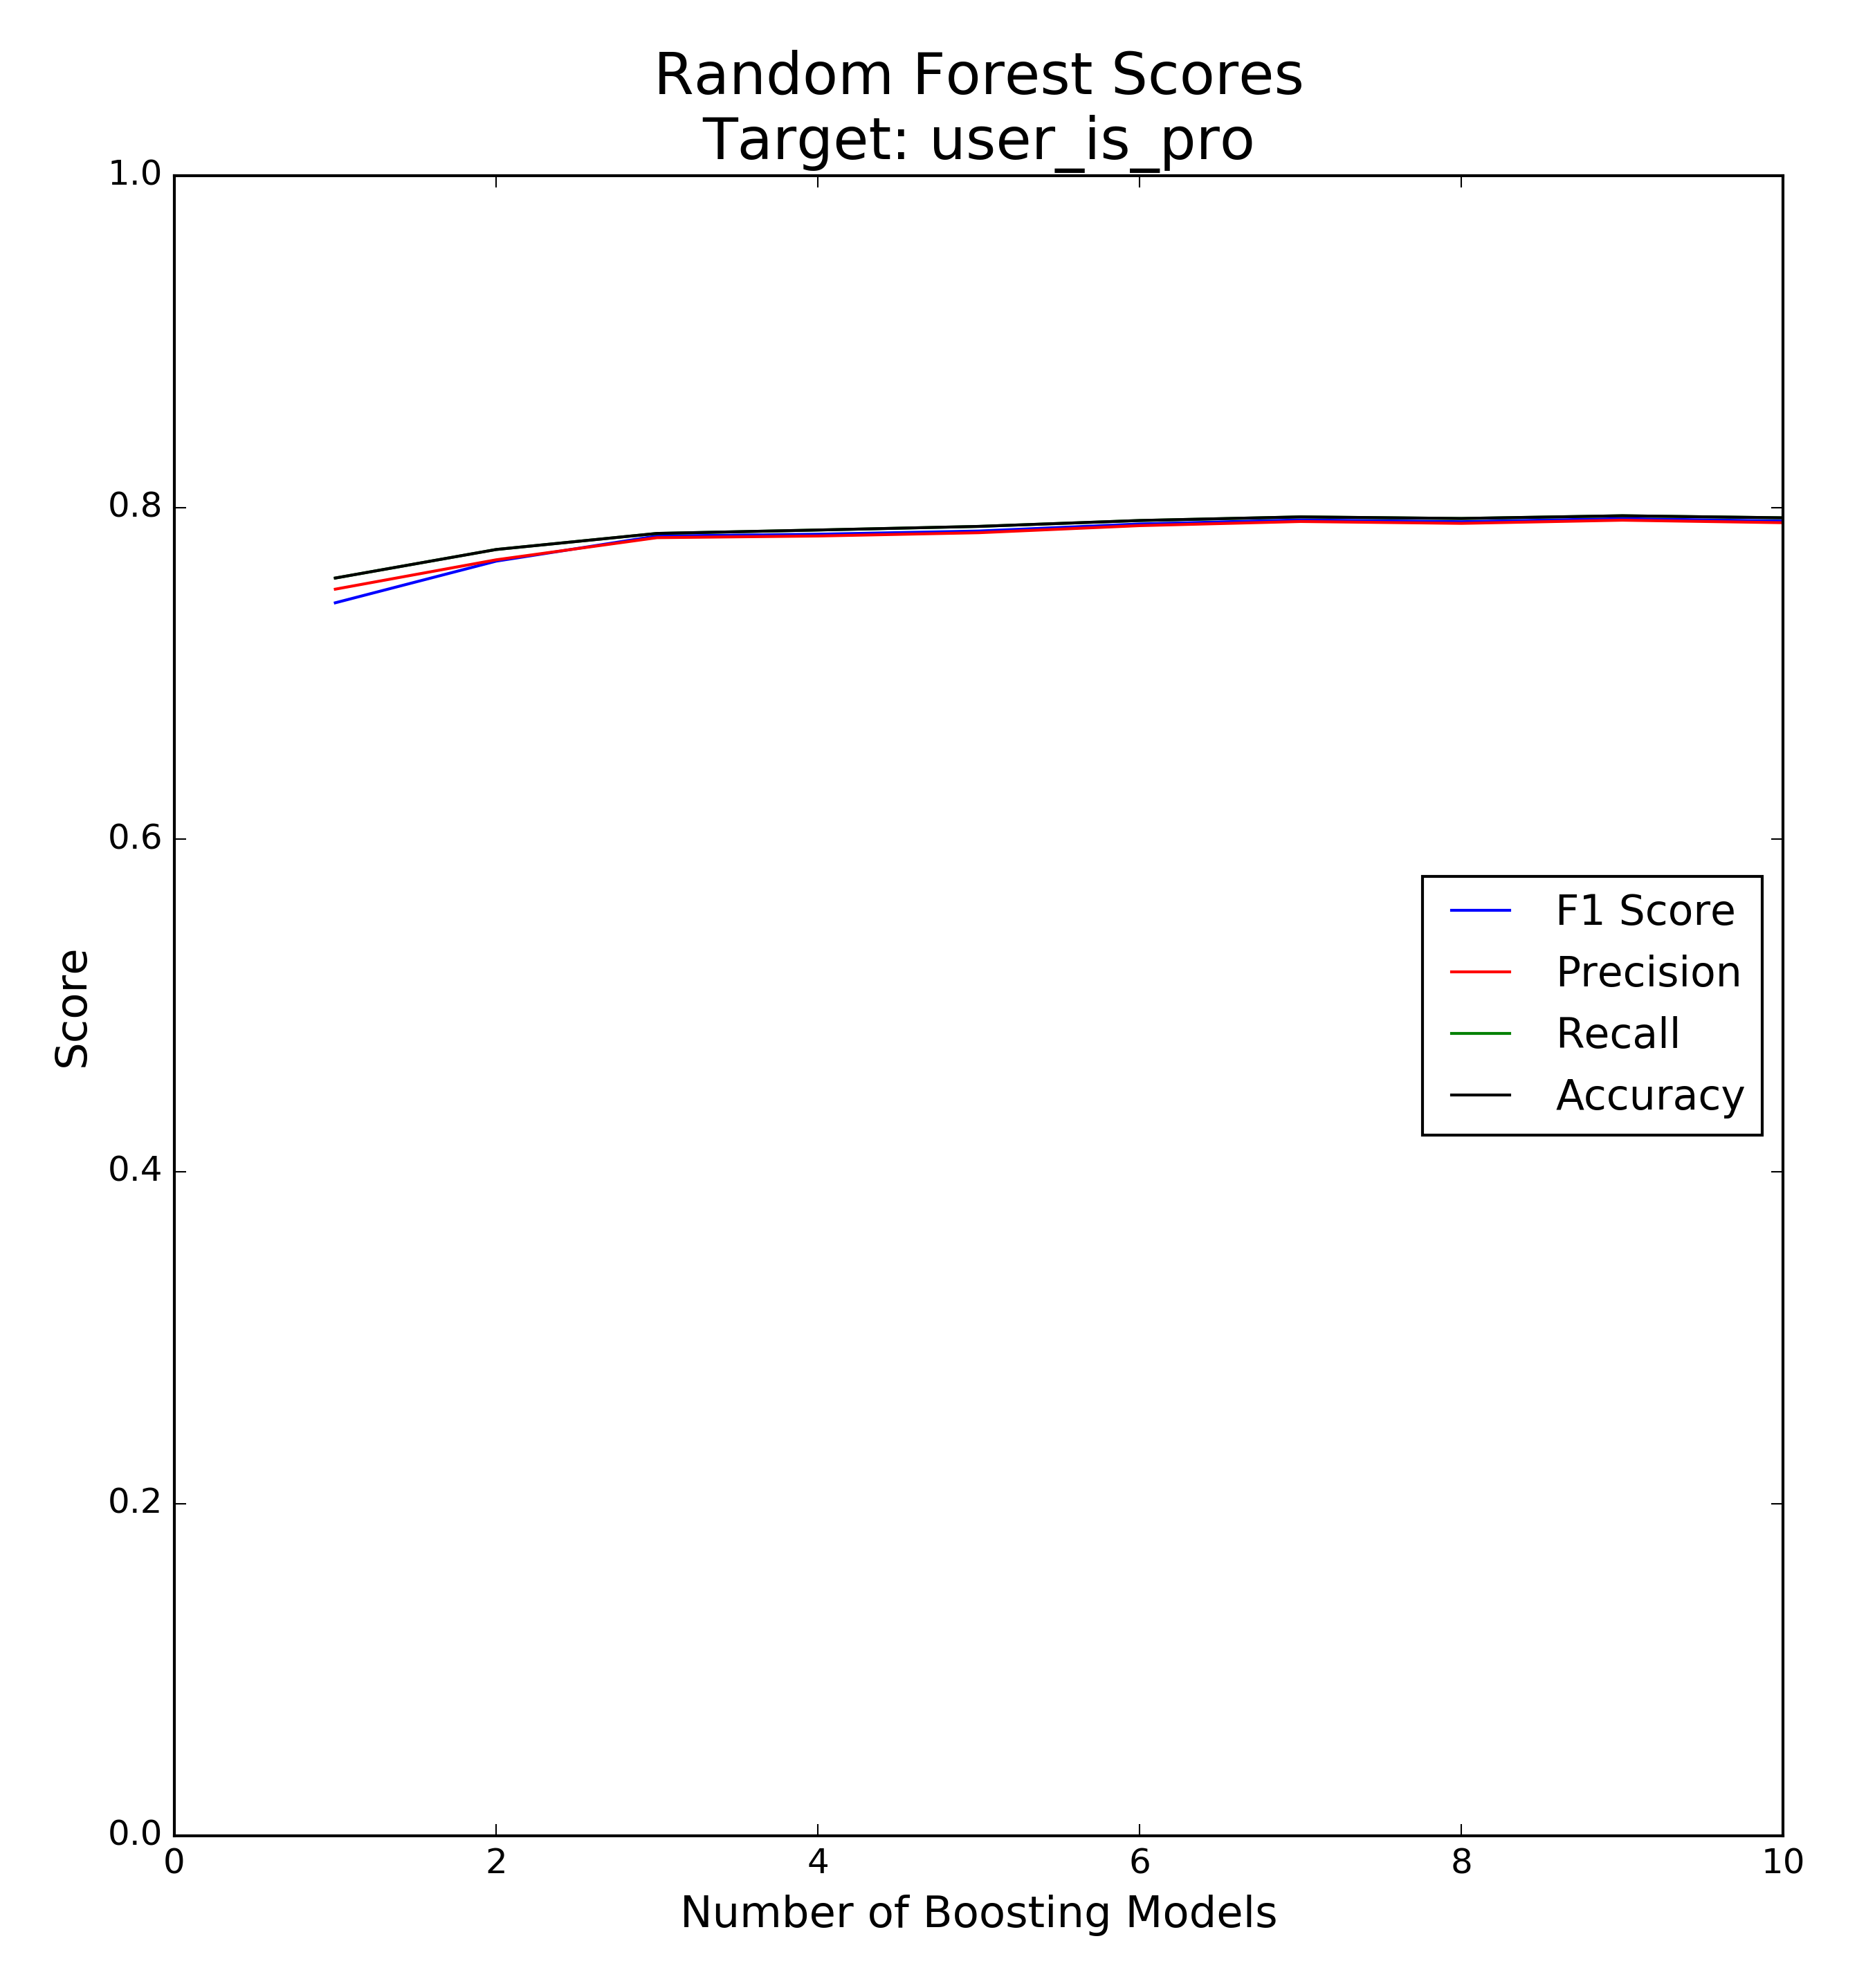

In [63]:
from IPython.display import Image
Image(filename='../../Photo_Pro/data/store/GBC_model_user_is_pro_ANIMALS_plot.png') 